

Behavioral Data Exploration
___________________________
The experiment provided the EEG dataset contains a certain pipeline:

    1. BDM: Pictures of different products were presented to the participants.
            After every trial they rated the monetary value of the product- 'label'

    2. AD: The subjects watched different commersials dedicated to the same products 
        and rated their monetary value again, addtionaly to 'liking' rating for each commersial.

This notebook aimed for analysing and graphing the statistical nature of the behavioral dataset
For furtuer information about the dataset structure see the README file



In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from classes_and_functions import MatlabDataImporter
import cleanup_func
from tests import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [213]:
def data_impoter(df_name,path=r'D:\YanivA01\Documents\Python\PyCourse\AllEEG.mat'):

    """
    This function creat a MatlabDataImpoter class, defined in 
    classes_and_function.py file. After reading, parse and clean
    using the class methods the defines the DataFrames columns
    as floats.

        Parameters
        ----------
        path : path
            The path of the matlab EEG matrix 
        
        df_name : string
            Which data frame is required
            'bdm' or 'ad' are valid values

        Returns
        ----------
        bdm_df : pandas DataFrame
            The BDM database after cleaning
        ad_df : pandas DataFrame
            The BDM database after cleaning
    """
    # Create an MatlabDataImporter object containing the EEG data-set

    data_set=MatlabDataImporter(path)

    # Read, parse and clean the data set via  classes_and_functions

    data_set.read_data()
    data_set.parse_data()
    data_set.clean_dfs()

    # Import the databases

    bdm_df= data_set.bdm_df
    ad_df= data_set.ad_df

    # Transform numeric fields types to float

    bdm_df["label"]=bdm_df["label"].astype('float')
    bdm_df["sub_id"]=bdm_df["sub_id"].astype('float')
    ad_df["label"]=ad_df["label"].astype('float')
    ad_df["sub_id"]=ad_df["sub_id"].astype('float')
    ad_df["ad_id"]=ad_df["ad_id"].astype('float')
    ad_df["liking"]=ad_df["liking"].astype('float')
    ad_df['category']=ad_df['category'].astype(str)
    ad_df['item']=ad_df['item'].astype(str)



    if df_name=='bdm':
        return bdm_df 

    elif df_name=='ad':
        return ad_df

    else:
        raise Exception(f'df_name is not valid. Please insert "bdm" or "ad" and try again')

The matlab file is ready to be read! 
 Use the "read_data" method to load it
Reading data into a python dict
resulting keys will be corroborated with expected fields for the
analysis to continue smoothly
fields are checked - we're good to go!
use the "parse_data" method next
Parsing the data from the dict into DataFrames...

Done! The data is organized in DataFrames.
The next phase of the process is cleaning the data with the "clean_dfs" method
DataFrames are clean, The next stage of the process is testing, with "test_dfs" (method)


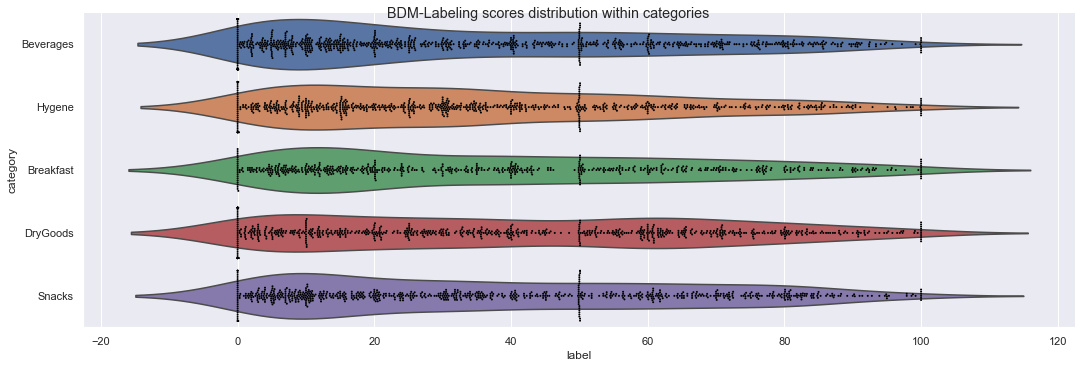

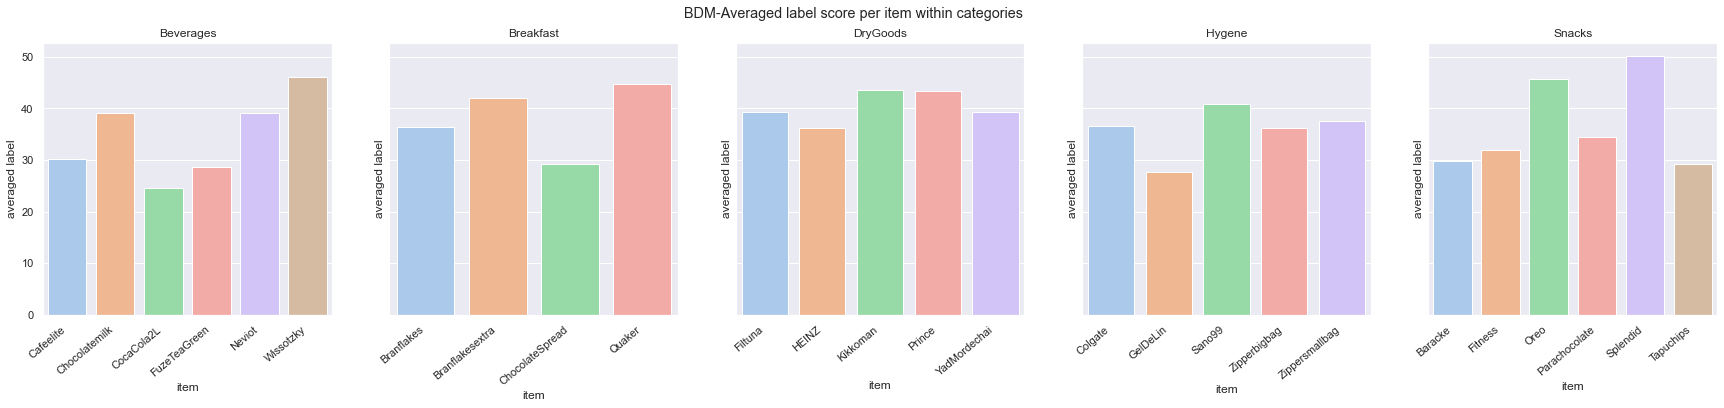

In [206]:



def bdm_label_distribution():
    """
    Produces graphical display of the labeling distribution
    between categories and within categories

    "label" column contains numeric values between 0-100
    one category can contain multiple items

    """
    bdm_df=data_impoter('bdm')
    itemed_df= bdm_df[["item","category","label"]]

    # Graphing label distribution in each category

    g = sns.catplot(x="label", 
                    y="category", 
                    kind="violin", 
                    inner=None, 
                    data=itemed_df,
                    height=5, 
                    aspect=3)
    _=sns.swarmplot(x="label", 
                    y="category",
                     color="black", 
                     size=2, 
                     data=itemed_df, 
                     ax=g.ax)
    _=g.fig.suptitle("BDM-Labeling scores distribution within categories")

    # Grouping data by category and calculate the averaged label per item

    itemed_grouped=itemed_df.groupby(['category','item']).mean("label")
    itemed_grouped=itemed_grouped.reset_index()
    categories= itemed_grouped['category'].unique()

    # Graphing label average within categories

    fig, axes = plt.subplots(1, len(categories), figsize=(30, 5), sharey=True)
    fig.suptitle('BDM-Averaged label score per item within categories')
    for i,category in enumerate(categories) :
        data= itemed_grouped.loc[itemed_grouped['category']==category]
        sns.barplot(ax=axes[i],
                    data=data,
                    x='item', 
                    y='label',
                    palette="pastel")
        axes[i].set(ylabel='averaged label')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=40, ha="right")            
        axes[i].set_title(category)


        

bdm_label_distribution()

The matlab file is ready to be read! 
 Use the "read_data" method to load it
Reading data into a python dict
resulting keys will be corroborated with expected fields for the
analysis to continue smoothly
fields are checked - we're good to go!
use the "parse_data" method next
Parsing the data from the dict into DataFrames...

Done! The data is organized in DataFrames.
The next phase of the process is cleaning the data with the "clean_dfs" method
DataFrames are clean, The next stage of the process is testing, with "test_dfs" (method)


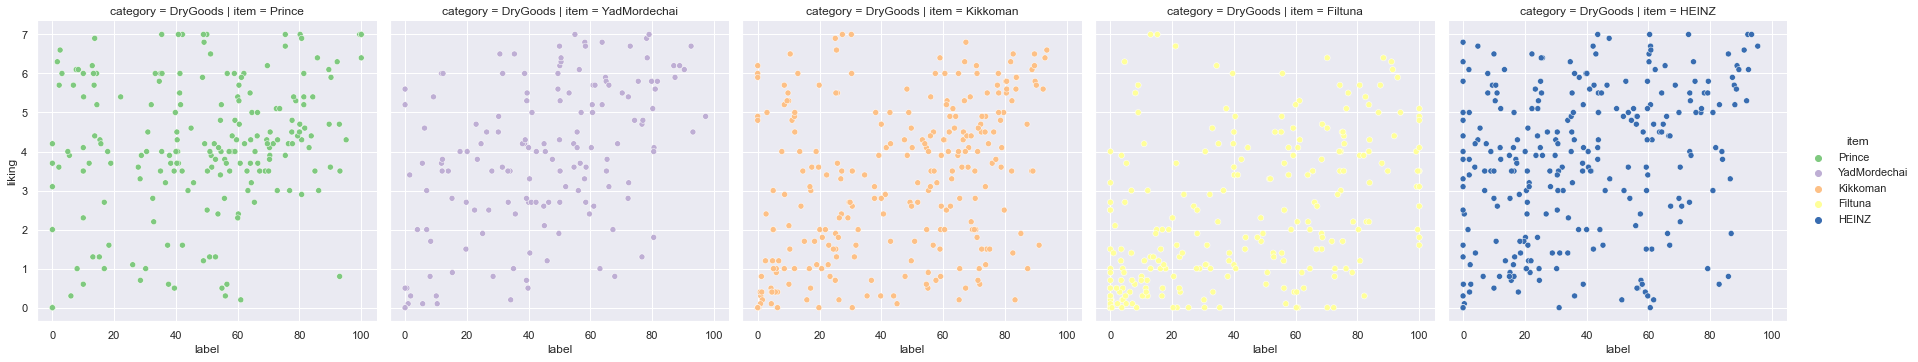

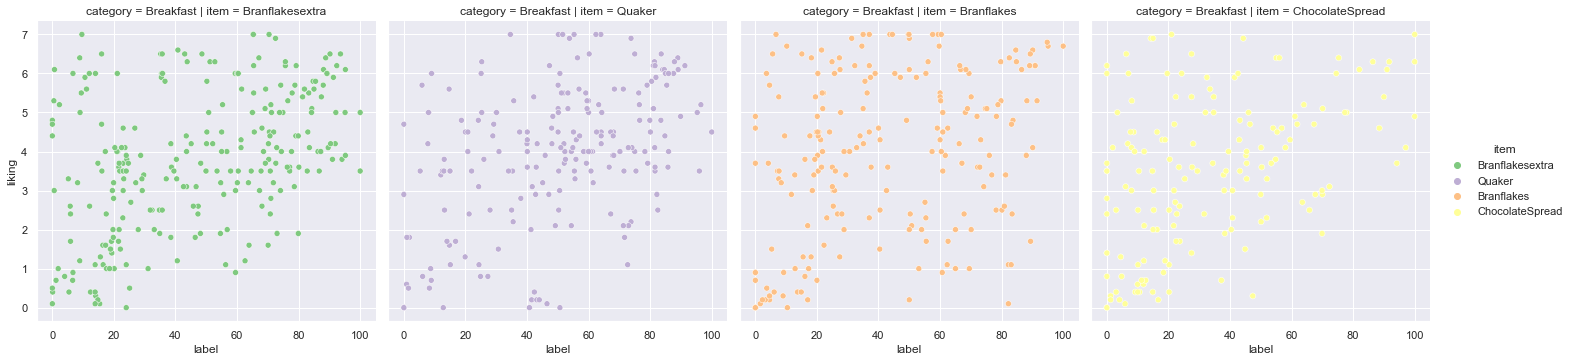

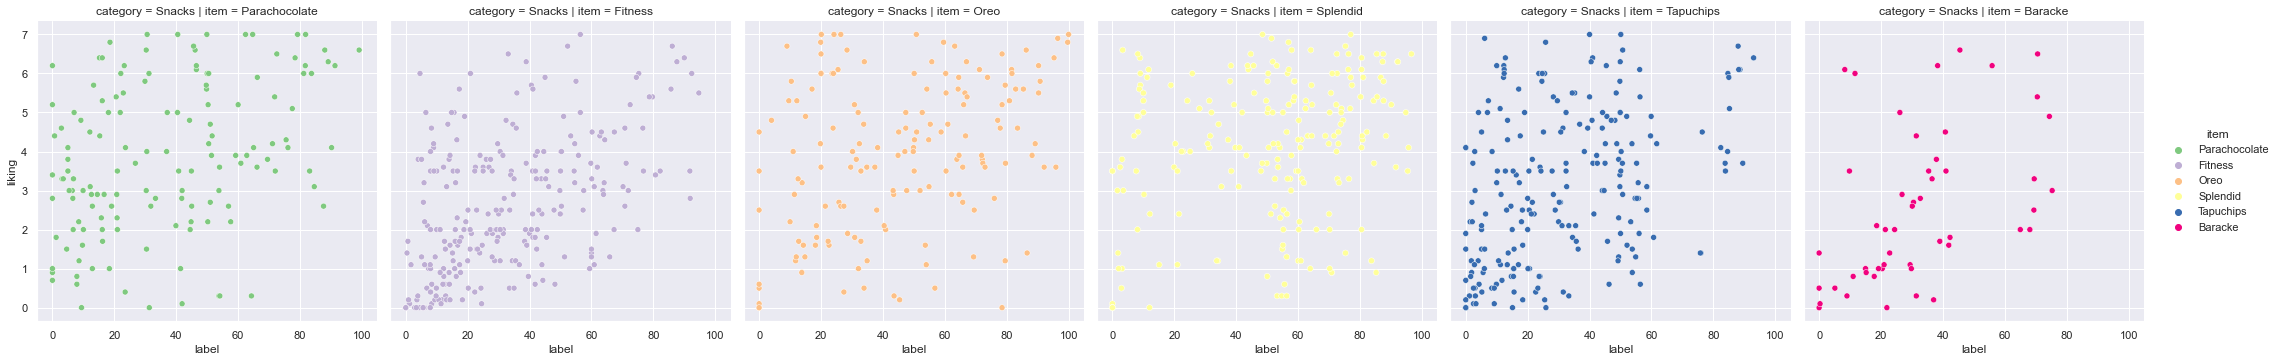

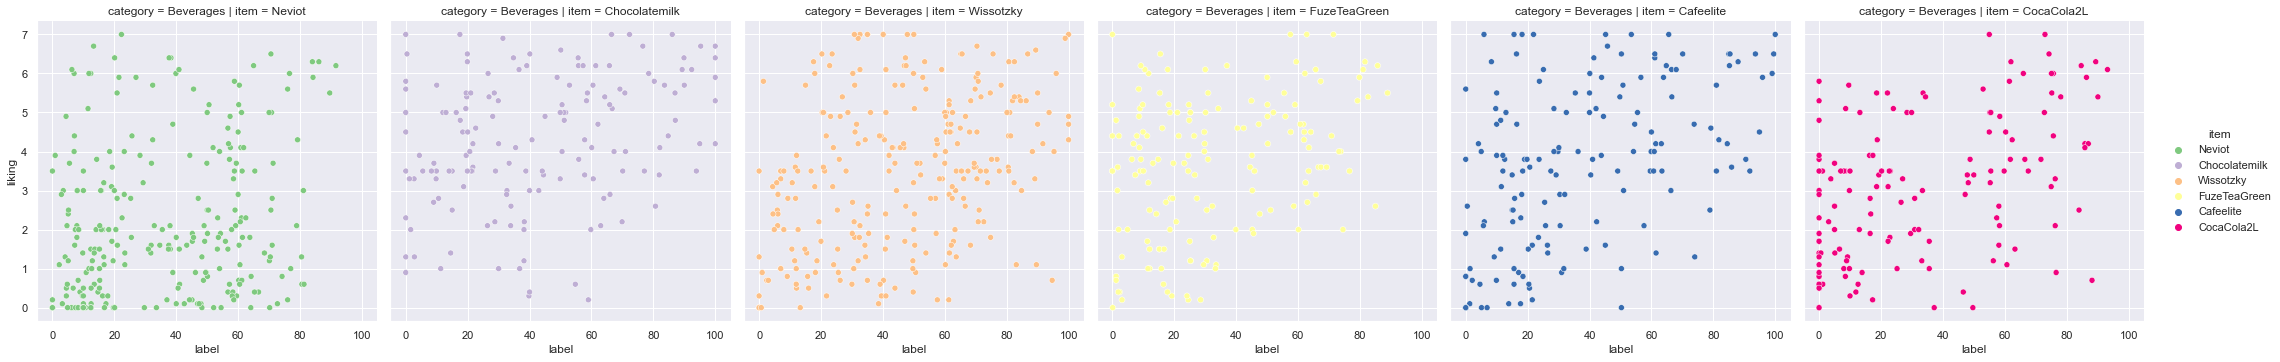

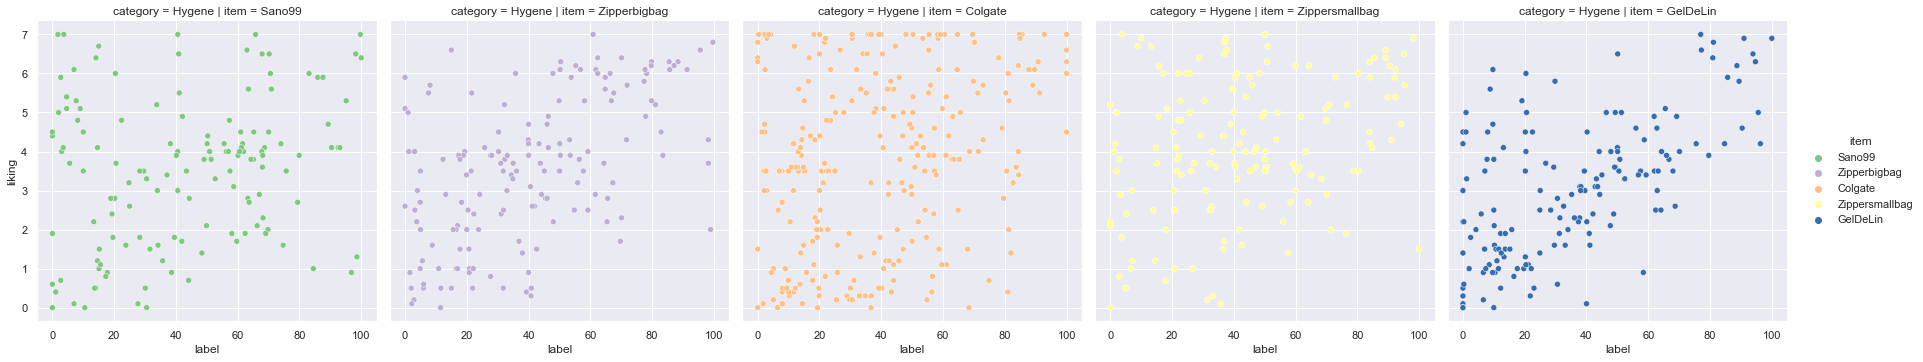

In [237]:
def ad_scatter():
    """
    Plot an explanatory graph showing each item's 
    liking and labeling values relationship

    """
    ad_df=data_impoter('ad')

    # Dropping indexes in eeg data

    ad_df=ad_df.drop(columns=['eeg','repitition','item_id','sub_id'])

    # Get the categories names

    categories= ad_df['category'].unique()

    # For every category, plot the liking and label values for each product
    for category in categories :
        data= ad_df.loc[ad_df['category']==category]
        s=sns.relplot(x="label",
                    y="liking",
                    hue="item", 
                    row="category",
                    col="item",
                    height=5,
                    palette="Accent", 
                    estimator=None, 
                    data=data)
        

    
ad_scatter()

The matlab file is ready to be read! 
 Use the "read_data" method to load it
Reading data into a python dict
resulting keys will be corroborated with expected fields for the
analysis to continue smoothly
fields are checked - we're good to go!
use the "parse_data" method next
Parsing the data from the dict into DataFrames...

Done! The data is organized in DataFrames.
The next phase of the process is cleaning the data with the "clean_dfs" method
DataFrames are clean, The next stage of the process is testing, with "test_dfs" (method)
The matlab file is ready to be read! 
 Use the "read_data" method to load it
Reading data into a python dict
resulting keys will be corroborated with expected fields for the
analysis to continue smoothly
fields are checked - we're good to go!
use the "parse_data" method next
Parsing the data from the dict into DataFrames...

Done! The data is organized in DataFrames.
The next phase of the process is cleaning the data with the "clean_dfs" method
DataFrames ar

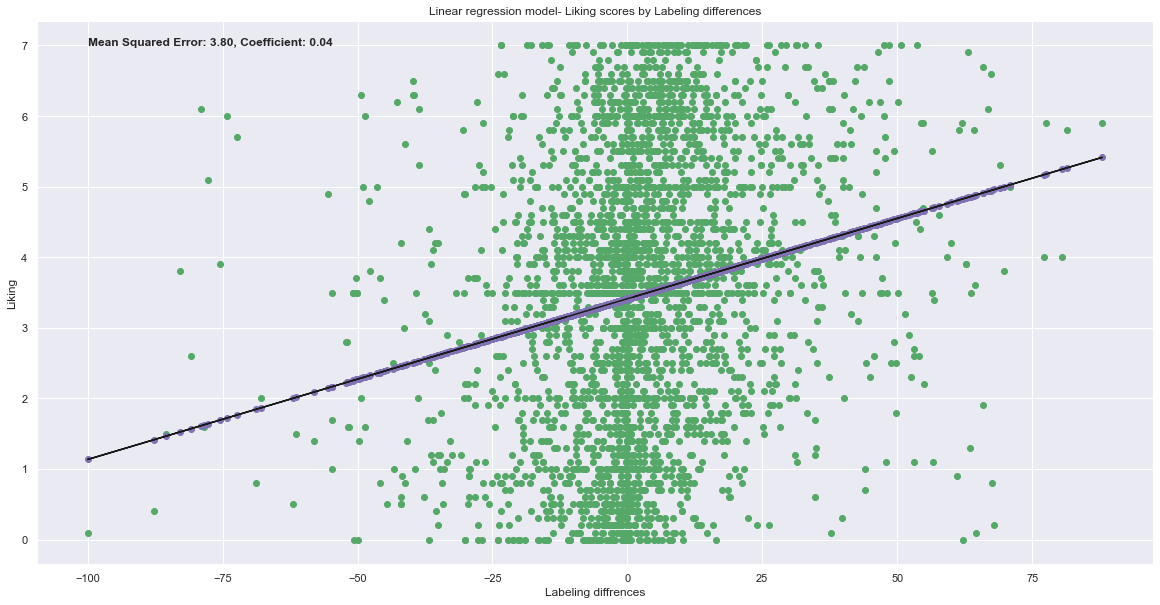

In [239]:
def ad_power_regression():
    """
    Creates linear regression model and plotting 
    the prediction relationship between 'liking' score
    for each commercial and the differece in the 'label'
    between before watching ads (bdm_df) and after watching it (ad_df)

    """
    bdm_df=data_impoter('bdm')
    ad_df=data_impoter('ad')

    # Create new merged DataFrame with BDM & AD datasets

    bdm_df=bdm_df.rename(columns={'label': 'pre_label'})
    ad_df=ad_df.rename(columns={'label': 'post_label'})
    linear_df = pd.merge(left=ad_df,
                         right=bdm_df,  
                         how='left', 
                         left_on=['sub_id','item'], 
                         right_on = ['sub_id','item'])
    linear_df.dropna()

    # Reduce the initial item label (BDM) from the final label (AD)

    linear_df["label_diff"]= linear_df["post_label"]-linear_df["pre_label"]

    # Create single predictor vector

    X= linear_df.label_diff.to_numpy().reshape(len(linear_df),1)
    Y= linear_df.liking

    # Split train-test

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        Y,
                                                        random_state=0,
                                                        test_size=0.33)
    # Simple linear regression model

    linear_regressor = LinearRegression()  
    _=linear_regressor.fit(X_train, y_train)  
    y_pred = linear_regressor.predict(X_test)  

    # Coefficient`  s calculation

    mse=mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)

    # Plotting Data evaluation

    fig, ax = plt.subplots(figsize=(20, 10))

    # Comparing between the real values and the predicted ones

    _=plt.scatter(x=X_test, y=y_test,color='g')
    _=plt.scatter(x=X_test,y=y_pred,color='m')
    _=plt.plot(X_test,y_pred,color='k')
    plt.title("Linear regression model- Liking scores by Labeling differences")
    ax.set_xlabel("Labeling diffrences")
    ax.set_ylabel("Liking")
    plt.text(-100,
             7, 
             f'Mean Squared Error: {mse:.2f}, Coefficient: {r2:.2f}',
             fontweight='bold')


ad_power_regression()


Conclusion: weak, un-recommended model for our data.
Very low coefficient value. 
It seemes that most of the subjects *did not* change their Label rating after watching the ads,
even when they rated the Liking measurement as high for the ads.